In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data"
file_name = "Data_UF_cleaned.xlsx"


df = pd.read_excel(f"{folder_path}\\{file_name}")

In [73]:
print("=== INFO ===")
print(df.info())

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23623 entries, 0 to 23622
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Contract_ID         21593 non-null  object 
 1   Gender              23623 non-null  int64  
 2   Age                 23623 non-null  int64  
 3   Region              21593 non-null  object 
 4   Managing Branch     21593 non-null  object 
 5   Sales Unit          5514 non-null   object 
 6   Selling branch      19832 non-null  object 
 7   Sales Region        19832 non-null  object 
 8   Creation Date       23623 non-null  object 
 9   OrderID/RegCode     16282 non-null  object 
 10  Transaction code    1254 non-null   object 
 11  Type                16927 non-null  object 
 12  FG Package Command  23622 non-null  object 
 13  Payment Month       23623 non-null  int64  
 14  Revenue             23622 non-null  float64
 15  Sales Channel       22490 non-null  obje

In [74]:
print("\n=== DESCRIBE ===")
print(df.describe(include='all'))


=== DESCRIBE ===
                  Contract_ID        Gender           Age          Region  \
count                   21593  23623.000000  23623.000000           21593   
unique                  21540           NaN           NaN              15   
top     HD4018334318042840576           NaN           NaN  07.Ho Chi Minh   
freq                        3           NaN           NaN           15030   
mean                      NaN      0.434703     41.039749             NaN   
std                       NaN      0.495729     10.138403             NaN   
min                       NaN      0.000000     16.000000             NaN   
25%                       NaN      0.000000     34.000000             NaN   
50%                       NaN      0.000000     41.000000             NaN   
75%                       NaN      1.000000     48.000000             NaN   
max                       NaN      1.000000     66.000000             NaN   

       Managing Branch Sales Unit Selling branch    Sales

In [75]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())




=== MISSING VALUES ===
Contract_ID            2030
Gender                    0
Age                       0
Region                 2030
Managing Branch        2030
Sales Unit            18109
Selling branch         3791
Sales Region           3791
Creation Date             0
OrderID/RegCode        7341
Transaction code      22369
Type                   6696
FG Package Command        1
Payment Month             0
Revenue                   1
Sales Channel          1133
Status FGame              0
Active Date            2924
Service Start Date     8062
Service End Date       8063
Internet Package       2924
Cancellation Date     10199
Sales Method              0
dtype: int64


In [76]:
# Remove row contain "Bundle"
df = df[df['Sales Method'] != 'Bundle']


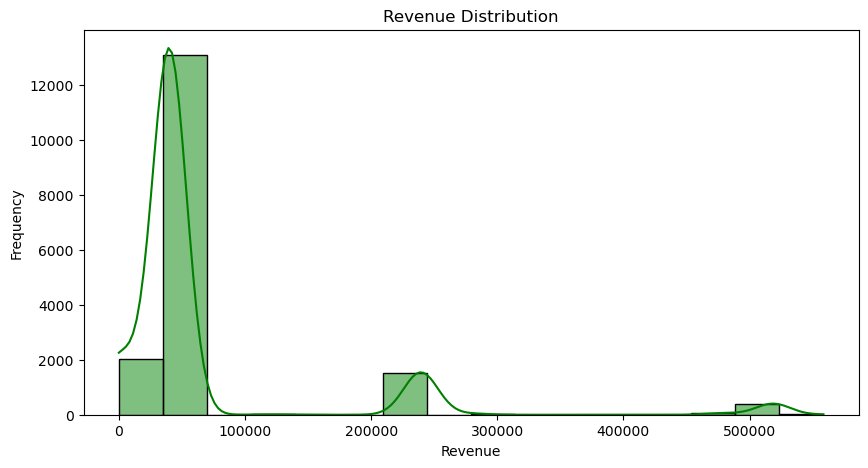

In [77]:
# ---------------------------
# 2. REVENUE DISTRIBUTION
# ---------------------------
plt.figure(figsize=(10, 5))
sns.histplot(df['Revenue'], kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [78]:
from dateutil import parser
# Force full parsing first (convert all to datetime)
def parse_mixed_date_force(date_str):
    try:
        return pd.to_datetime(str(date_str), dayfirst=True, errors='coerce')
    except:
        return pd.NaT

df['Creation Date'] = df['Creation Date'].apply(parse_mixed_date_force)

# Now format to consistent dd/mm/yyyy
df['Creation Date'] = pd.to_datetime(df['Creation Date'], format='%d/%m/%Y', errors='coerce')
    
# Group by month and compute total revenue
df['month'] = df['Creation Date'].dt.to_period('M')
monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()
monthly_revenue = monthly_revenue[monthly_revenue > 0].reset_index()




df

C:\Users\Thinkpad P1\AppData\Local\Temp\ipykernel_20204\210790394.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.set_index('Creation Date').resample('M')['Revenue'].sum()


,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,Creation Date,OrderID/RegCode,...,Revenue,Sales Channel,Status FGame,Active Date,Service Start Date,Service End Date,Internet Package,Cancellation Date,Sales Method,month
0,HD1262187733434228224,1,59,07.Ho Chi Minh,HCM_02,NaN,NaN,NaN,2024-01-01,FG00027082,...,39900.0,Hi-FPT,Đã hủy,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
1,HD138975645429405536,1,36,07.Ho Chi Minh,HCM_04,NaN,NaN,NaN,2024-01-01,FG00027050,...,39900.0,Hi-FPT,Đã hủy,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
2,HD1415792837332678912,0,54,07.Ho Chi Minh,HCM_03,NaN,NaN,NaN,2024-01-01,FG00027095,...,39900.0,Hi-FPT,Đã hủy,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
3,HD1594279484202634496,0,31,11.Tay Bac Bo,PTO,NaN,NaN,NaN,2024-01-01,FG00027102,...,39900.0,Hi-FPT,Đã hủy,1/1/2024,1/1/2024,1/2/2024,Sky,01/02/2024,Code,2024-01
6,HD2492698124504546304,0,43,07.Ho Chi Minh,HCM_01,NaN,NaN,NaN,2024-01-01,FG00027044,...,39900.0,Hi-FPT,Đã hủy,1/1/2024,1/1/2024,1/2/2024,Meta,01/02/2024,Code,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23617,HD8580153456998903808,1,48,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213809,...,39900.0,Hi-FPT,Đã hủy,31/12/2024,31/12/2024,31/01/2025,Meta,31/01/2025,Code,2024-12
23618,HD866678989154166144,1,46,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30212750,...,39900.0,Hi-FPT,Đã hủy,31/12/2024,31/12/2024,31/01/2025,Sky,31/01/2025,Code,2024-12
23619,HD8982285178629733376,1,57,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213328,...,239400.0,Hi-FPT,Đã kích hoạt,31/12/2024,31/12/2024,30/06/2025,Sky,NaN,Code,2024-12
23620,HD9039558116633409536,0,60,07.Ho Chi Minh,HCM_04,NaN,HCM - CN14,07.Ho Chi Minh,2024-12-31,SGK30213608,...,518700.0,Hi-FPT,Đã kích hoạt,31/12/2024,31/12/2024,31/01/2026,Sky,NaN,Code,2024-12


In [79]:
#df.to_excel('output.xlsx', index=False)


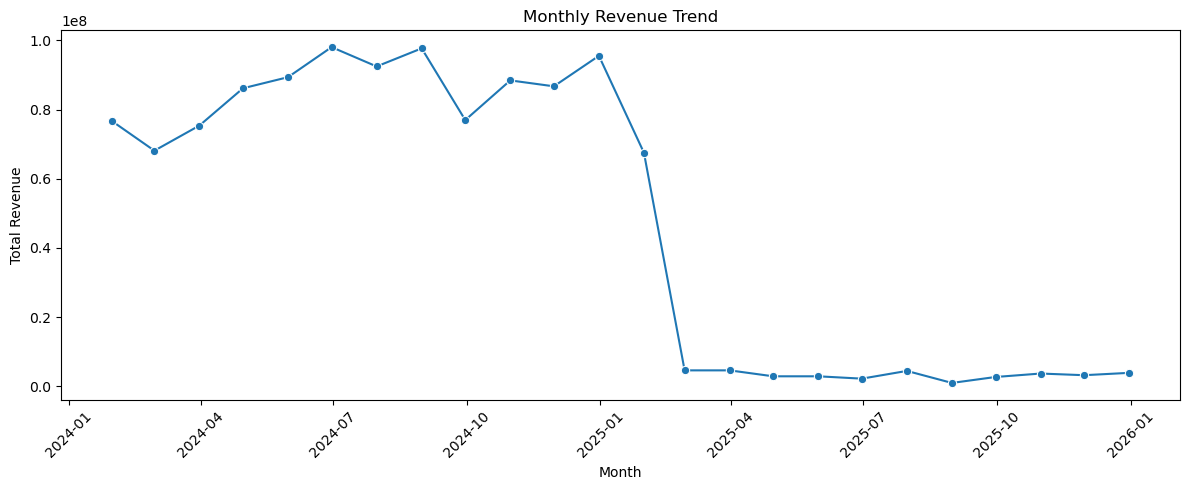

Month-over-Month Revenue Changes:
   Creation Date     Revenue  Revenue_diff  Revenue_pct_change
0     2024-01-31  76608000.0           NaN                 NaN
1     2024-02-29  68109300.0    -8498700.0          -11.093750
2     2024-03-31  75371100.0     7261800.0           10.661980
3     2024-04-30  86144100.0    10773000.0           14.293277
4     2024-05-31  89351100.0     3207000.0            3.722832
5     2024-06-30  98034300.0     8683200.0            9.718067
6     2024-07-31  92448300.0    -5586000.0           -5.698006
7     2024-08-31  97675200.0     5226900.0            5.653863
8     2024-09-30  76957200.0   -20718000.0          -21.211116
9     2024-10-31  88418400.0    11461200.0           14.892953
10    2024-11-30  86708100.0    -1710300.0           -1.934326
11    2024-12-31  95520600.0     8812500.0           10.163410
12    2025-01-31  67510800.0   -28009800.0          -29.323308
13    2025-02-28   4628400.0   -62882400.0          -93.144208
14    2025-03-31   46

In [80]:


# ---------------------------
# 5. Compute changes
# ---------------------------
monthly_revenue['Revenue_diff'] = monthly_revenue['Revenue'].diff()
monthly_revenue['Revenue_pct_change'] = monthly_revenue['Revenue'].pct_change() * 100

# ---------------------------
# 6. Plot Monthly Revenue
# ---------------------------
plt.figure(figsize=(12, 5))
sns.lineplot(x='Creation Date', y='Revenue', data=monthly_revenue, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Optional: Show MoM changes
# ---------------------------
print("Month-over-Month Revenue Changes:")
print(monthly_revenue[['Creation Date', 'Revenue', 'Revenue_diff', 'Revenue_pct_change']])

In [81]:
monthly_revenue

,Creation Date,Revenue,Revenue_diff,Revenue_pct_change
0,2024-01-31,76608000.0,NaN,NaN
1,2024-02-29,68109300.0,-8498700.0,-11.093750
2,2024-03-31,75371100.0,7261800.0,10.661980
3,2024-04-30,86144100.0,10773000.0,14.293277
4,2024-05-31,89351100.0,3207000.0,3.722832
5,2024-06-30,98034300.0,8683200.0,9.718067
6,2024-07-31,92448300.0,-5586000.0,-5.698006
7,2024-08-31,97675200.0,5226900.0,5.653863
8,2024-09-30,76957200.0,-20718000.0,-21.211116
9,2024-10-31,88418400.0,11461200.0,14.892953


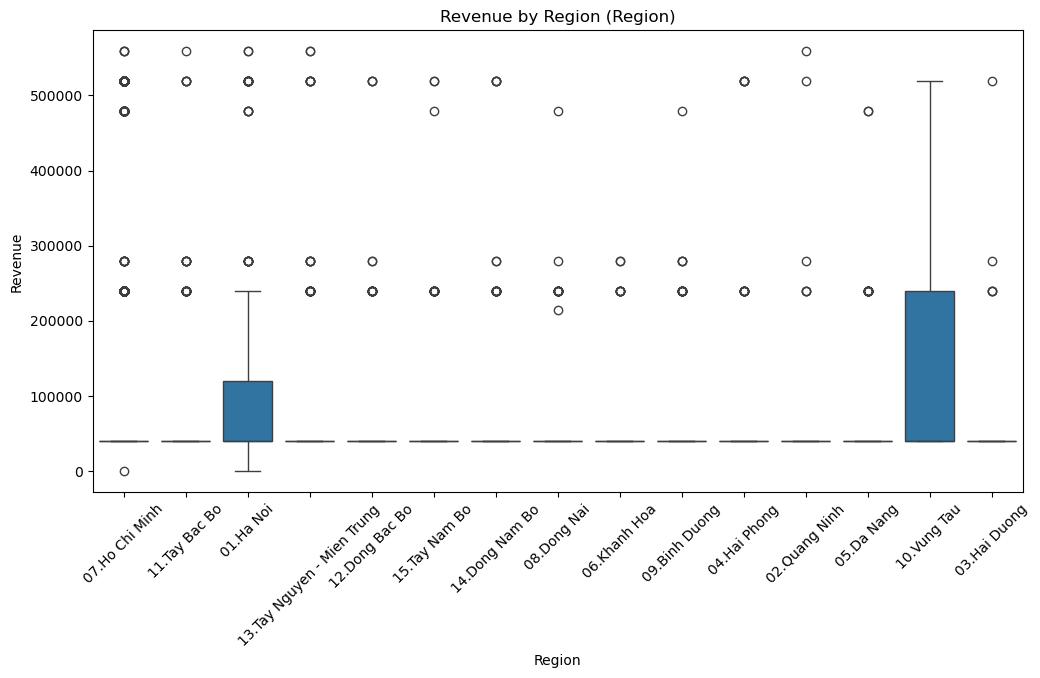


=== AVERAGE REVENUE BY REGION ===
Region
10.Vung Tau                   110556.250000
13.Tay Nguyen - Mien Trung    106302.919708
01.Ha Noi                     104365.714286
04.Hai Phong                   96169.230769
11.Tay Bac Bo                  96085.714286
05.Da Nang                     92352.808989
14.Dong Nam Bo                 90194.117647
12.Dong Bac Bo                 87188.888889
02.Quang Ninh                  85785.000000
06.Khanh Hoa                   85639.024390
03.Hai Duong                   83790.000000
15.Tay Nam Bo                  78214.569536
08.Dong Nai                    76340.540541
09.Binh Duong                  75066.101695
07.Ho Chi Minh                 72867.326733
Name: Revenue, dtype: float64


In [82]:
# ---------------------------
# 4. REVENUE BY REGION
# ---------------------------
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Revenue', data=df)
plt.title('Revenue by Region (Region)')
plt.xticks(rotation=45)
plt.show()

region_avg = df.groupby('Region')['Revenue'].mean().sort_values(ascending=False)
print("\n=== AVERAGE REVENUE BY REGION ===")
print(region_avg)

### Gender

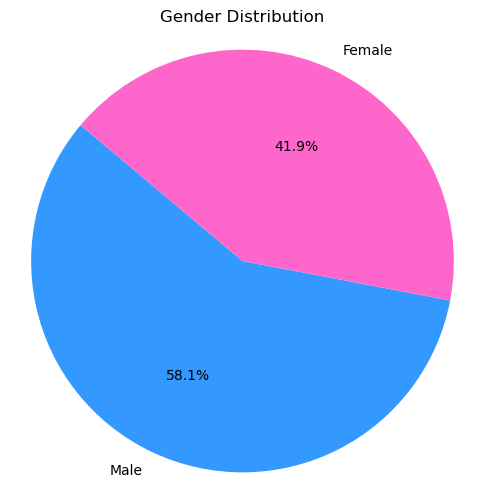

In [83]:
# 0:Nam 1:Nữ 
gender_counts = df['Gender'].value_counts()

labels = ['Male','Female']
sizes = [gender_counts.get(0,0), gender_counts.get(1,0)]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#3399FF', '#FF66CC'], startangle=140)
plt.title('Gender Distribution')
plt.axis('equal') 
plt.show()

### Age range

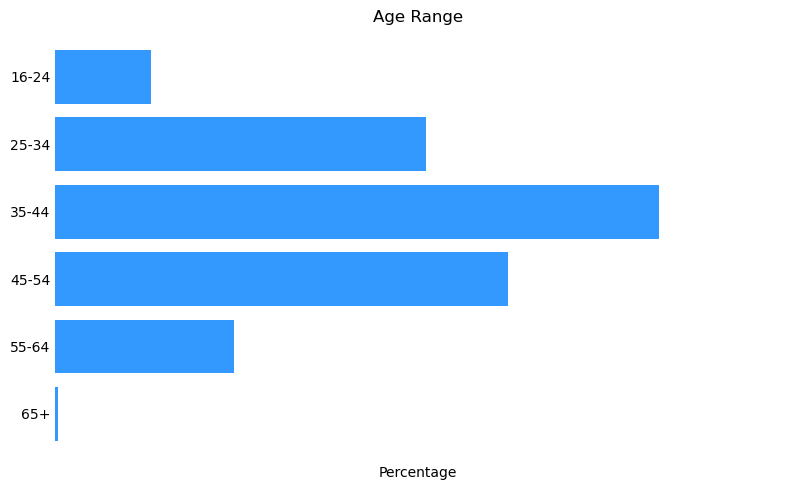

In [84]:
bins = [16, 24, 34, 44, 54, 64, 100]
labels = ['16-24', '25-34', '35-44', '45-54', '55-64', '65+']


# Step 3: Create a new column with age ranges
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Step 4: Count and normalize
age_groups_order = labels
age_counts = df['Age Range'].value_counts().reindex(age_groups_order, fill_value=0)
age_proportions = age_counts / age_counts.sum()

# Step 5: Plot
plt.figure(figsize=(8, 5))
plt.barh(age_groups_order, age_proportions, color='#3399FF')

plt.xlabel('Percentage')
plt.title('Age Range')

# Fix x-axis limit
max_value = age_proportions.max()
if max_value == 0:
    max_value = 1
plt.xlim(0, max_value * 1.2)

plt.xticks([])  # Hide numbers
plt.gca().invert_yaxis()

# Hide spines and ticks
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tick_params(axis='y', length=0)

plt.tight_layout()
plt.show()

In [85]:
df['Contract_ID'].value_counts()

Contract_ID
HD4018334318042840576    3
HD8873656229931550720    2
HD3951366192358597632    2
HD6978055731008976896    2
HD8358924727359758336    2
                        ..
HD6834439959885799424    1
HD6852676335650993152    1
HD6890027584984036352    1
HD6944342665428526080    1
HD945049732045696000     1
Name: count, Length: 15079, dtype: int64

In [86]:
duplicates = df[df['Contract_ID'].duplicated(keep=False)]
print(duplicates)


                 Contract_ID  Gender  Age          Region Managing Branch  \
1293   HD5438888045443808256       0   19  07.Ho Chi Minh          HCM_04   
3749                     NaN       0   33             NaN             NaN   
3750                     NaN       0   43             NaN             NaN   
3751                     NaN       0   42             NaN             NaN   
3752                     NaN       0   47             NaN             NaN   
...                      ...     ...  ...             ...             ...   
22112                    NaN       0   41             NaN             NaN   
22113                    NaN       0   53             NaN             NaN   
22938    HD95068320938616656       0   40  07.Ho Chi Minh          HCM_04   
22958  HD3319159152106828288       1   28  07.Ho Chi Minh          HCM_04   
23566                    NaN       0   39             NaN             NaN   

      Sales Unit Selling branch    Sales Region Creation Date OrderID/RegCo

In [87]:
duplicates = df['Contract_ID'].value_counts()
duplicates = duplicates[duplicates > 1]
print(duplicates)

Contract_ID
HD4018334318042840576    3
HD8873656229931550720    2
HD3951366192358597632    2
HD6978055731008976896    2
HD8358924727359758336    2
HD157009308889108032     2
HD8681003409337063424    2
HD3319159152106828288    2
HD8999751778095042560    2
HD2736817424462745088    2
HD3308571318735754752    2
HD3921092924113845248    2
HD5438888045443808256    2
HD7365966947959319552    2
HD8341352671055760384    2
HD6943743001756179456    2
HD1157350999381266688    2
HD95068320938616656      2
HD4146503099255920128    2
HD7766642411918927872    2
HD3768871471804996096    2
HD4228402906153288704    2
HD5650852625765238784    2
HD1938783856451533568    2
HD6513951671267010560    2
Name: count, dtype: int64


In [ ]:
# Import libraries
from numpy import arange, around
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

# =========================
# Step 1: Prepare your data
# =========================

# Load your user data (replace with your actual file path)
user_data = pd.read_csv('Data_UF_cleaned.csv', encoding='latin1')

# Region to province mapping
region_to_provinces = {
    '01.Dong Bac Bo': ['Bac Giang', 'Bac Kan', 'Cao Bang', 'Ha Giang', 'Lang Son', 'Phu Tho', 'Quang Ninh', 'Thai Nguyen', 'Tuyen Quang', 'Yen Bai'],
    '02.Dong Bang Song Hong': ['Bac Ninh', 'Ha Nam', 'Hai Duong', 'Hai Phong', 'Ha Noi', 'Hung Yen', 'Nam Dinh', 'Ninh Binh', 'Thai Binh', 'Vinh Phuc'],
    '03.Bac Trung Bo': ['Ha Tinh', 'Nghe An', 'Quang Binh', 'Quang Tri', 'Thanh Hoa', 'Thua Thien Hue'],
    '04.Duyen Hai Mien Trung': ['Binh Dinh', 'Da Nang', 'Khanh Hoa', 'Ninh Thuan', 'Phu Yen', 'Quang Nam', 'Quang Ngai'],
    '05.Tay Nguyen - Mien Trung': ['Dak Lak', 'Dak Nong', 'Gia Lai', 'Kon Tum', 'Lam Dong'],
    '06.Dong Nam Bo': ['Ba Ria - Vung Tau', 'Binh Duong', 'Binh Phuoc', 'Dong Nai', 'Ho Chi Minh City', 'Tay Ninh'],
    '07.Ho Chi Minh': ['Ho Chi Minh City'],
    '08.Tay Nam Bo': ['An Giang', 'Bac Lieu', 'Ben Tre', 'Ca Mau', 'Can Tho', 'Dong Thap', 'Hau Giang', 'Kien Giang', 'Long An', 'Soc Trang', 'Tien Giang', 'Tra Vinh', 'Vinh Long'],
    '09.Hai Dao': ['Hoang Sa', 'Truong Sa'],
    '11.Tay Bac Bo': ['Dien Bien', 'Hoa Binh', 'Lai Chau', 'Lao Cai', 'Son La']
}

# Clean region names
user_data['Region_clean'] = user_data['Region'].str.replace(r'^\d+\.', '', regex=True).str.strip()

# Count users by region
region_counts = user_data['Region'].value_counts()

# Map region counts to provinces
province_user_counts = {}
for region, provinces in region_to_provinces.items():
    count = region_counts.get(region, 0)
    if count > 0:
        per_province = count / len(provinces)
        for province in provinces:
            province_user_counts[province] = province_user_counts.get(province, 0) + per_province

province_user_df = pd.DataFrame(list(province_user_counts.items()), columns=['province', 'user_count'])

# =========================
# Step 2: Draw the map
# =========================

# Map bounding box
lon_min, lon_max = 101.2, 118
lat_min, lat_max = 4, 24.5

# Create basemap function
def create_basemap(ax, show_province_borders=False):
    m = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
                urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326, ax=ax)
    
    parallels = arange(lat_min, lat_max + 0.5, around((lat_max - lat_min) / 4, decimals=1))
    meridians = arange(lon_min, lon_max + 0.5, around((lon_max - lon_min) / 4, decimals=1))
    
    m.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10)
    
    try:
        m.readshapefile('haidao/haidao', 'haidao', linewidth=1, color='k')
    except FileNotFoundError:
        print("Shapefile 'haidao' not found.")
    
    try:
        m.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'country', linewidth=2, color='k')
    except FileNotFoundError:
        print("Shapefile 'gadm41_VNM_0' not found.")
    
    if show_province_borders:
        try:
            m.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'provinces', linewidth=1, color='k')
        except FileNotFoundError:
            print("Shapefile 'gadm41_VNM_1' not found.")
    
    return m

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Create map with province borders
m = create_basemap(ax, show_province_borders=True)
ax.set_title('Vietnam User Distribution Map with Province Borders')

# Add island labels
island_coords = [(111.5, 15.7, 'Hoàng Sa Island'), (114, 8, 'Trường Sa Island')]
for lon, lat, label in island_coords:
    x, y = m(lon, lat)
    ax.text(x, y, label, fontsize=10, ha='center', va='bottom', rotation=30, color='k')

# =========================
# Step 3: Overlay user distribution
# =========================

# Prepare province shapes and counts
province_shapes = []
province_user_counts = []

for info, shape in zip(m.provinces_info, m.provinces):
    province_name = info['NL_NAME_1'].split('|')[0]
    match = province_user_df[province_user_df['province'].str.contains(province_name, case=False, na=False)]
    user_count = match['user_count'].values[0] if not match.empty else 0
    province_shapes.append(shape)
    province_user_counts.append(user_count)

# Check actual user count range
print(f'Min user count: {min(province_user_counts)}, Max user count: {max(province_user_counts)}')

# Use fixed normalization range to improve color visibility
vmin = 0
vmax = max(province_user_counts)

cmap = plt.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Fill provinces with color
for shape, count in zip(province_shapes, province_user_counts):
    color = cmap(norm(count))
    poly = Polygon(shape, facecolor=color, edgecolor='black', linewidth=0.4)
    ax.add_patch(poly)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('User Count by Province')

# Final adjustments
plt.tight_layout()
plt.show()


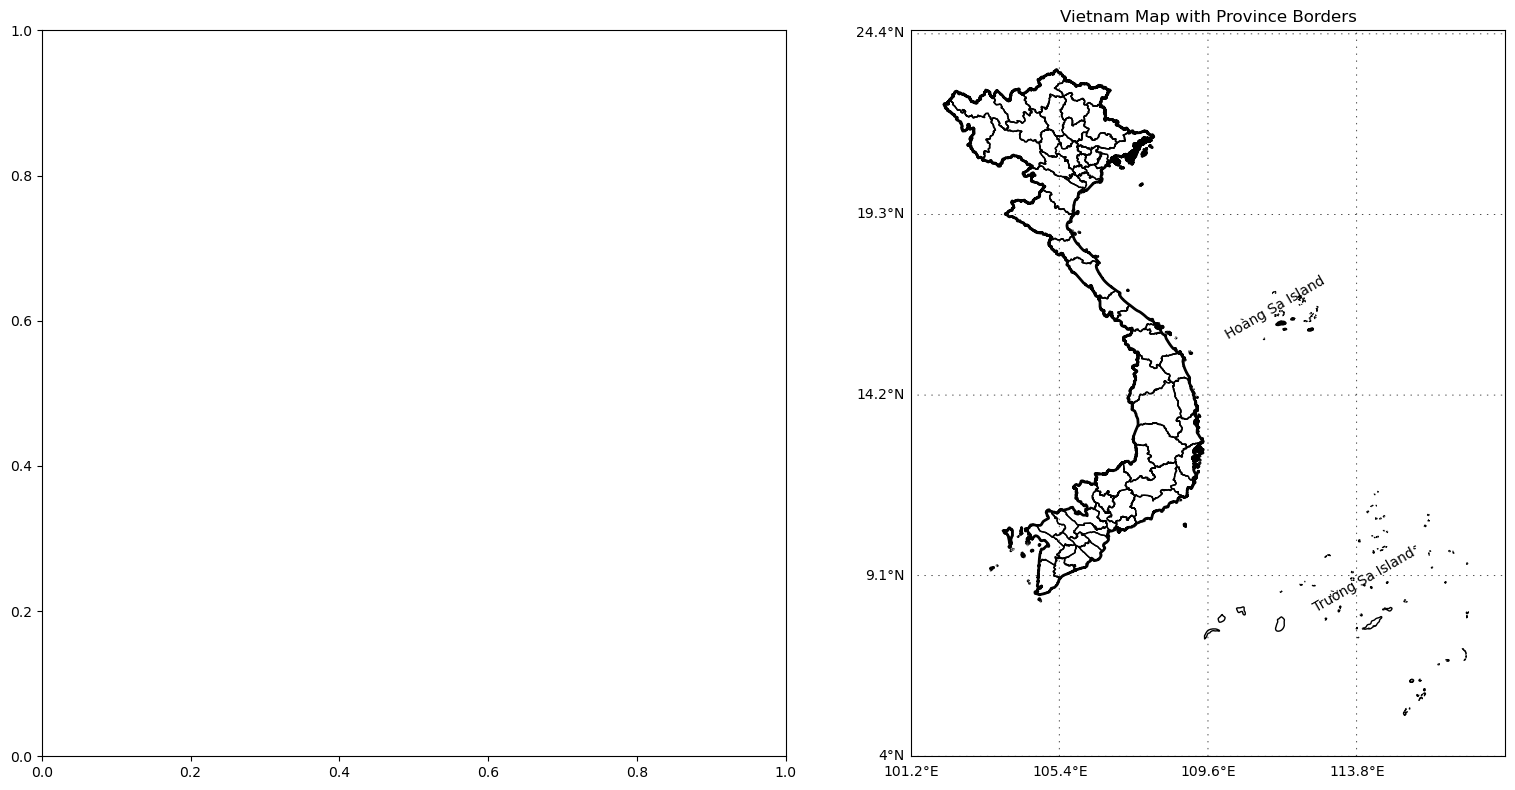

In [1]:
# Import libraries
from numpy import arange, around
from netCDF4 import Dataset
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set the bounding box for the map
lon_min, lon_max = 101.2, 118
lat_min, lat_max = 4, 24.5

# Function to create a basemap with a specified ax, and whether to show province borders
def create_basemap(ax, lon_min, lon_max, lat_min, lat_max, border_color='k', island_color='k', show_province_borders=False):
    # Create Basemap instance
    m = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
                urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326, ax=ax)
    
    # Set parallels and meridians
    parallels = arange(lat_min, lat_max + 0.5, around((lat_max - lat_min) / 4, decimals=1))
    meridians = arange(lon_min, lon_max + 0.5, around((lon_max - lon_min) / 4, decimals=1))
    
    # Draw parallels and meridians with labels
    m.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10)
    
    try:
        m.readshapefile('haidao/haidao', 'haidao', linewidth=1, color=island_color)
    except FileNotFoundError:
        print("Shapefile 'Islands/haidao' not found.")
    
    
    # Draw country borders
    m.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'gadm41_VNM_0', linewidth=2, color=border_color)
    
    # Optionally draw province borders
    if show_province_borders:
        try:
            m.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1', linewidth=1, color='k')
        except FileNotFoundError:
            print("Shapefile 'gadm41_VNM_1' not found.")
    
    return m

# Plotting the maps side by side
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Create second map with province borders
map_2 = create_basemap(ax[1], lon_min, lon_max, lat_min, lat_max, border_color='k', island_color='k', show_province_borders=True)
ax[1].set_title('Vietnam Map with Province Borders')

# Add labels for key islands
island_coords = [(111.5, 15.7, 'Hoàng Sa Island'), (114, 8, 'Trường Sa Island')]

for lon, lat, label in island_coords:
    ax[1].text(lon, lat, label, fontsize=10, ha='center', va='bottom', rotation=30, color='k')

# Show the maps
plt.tight_layout()
plt.show()


Min user count: 0, Max user count: 0


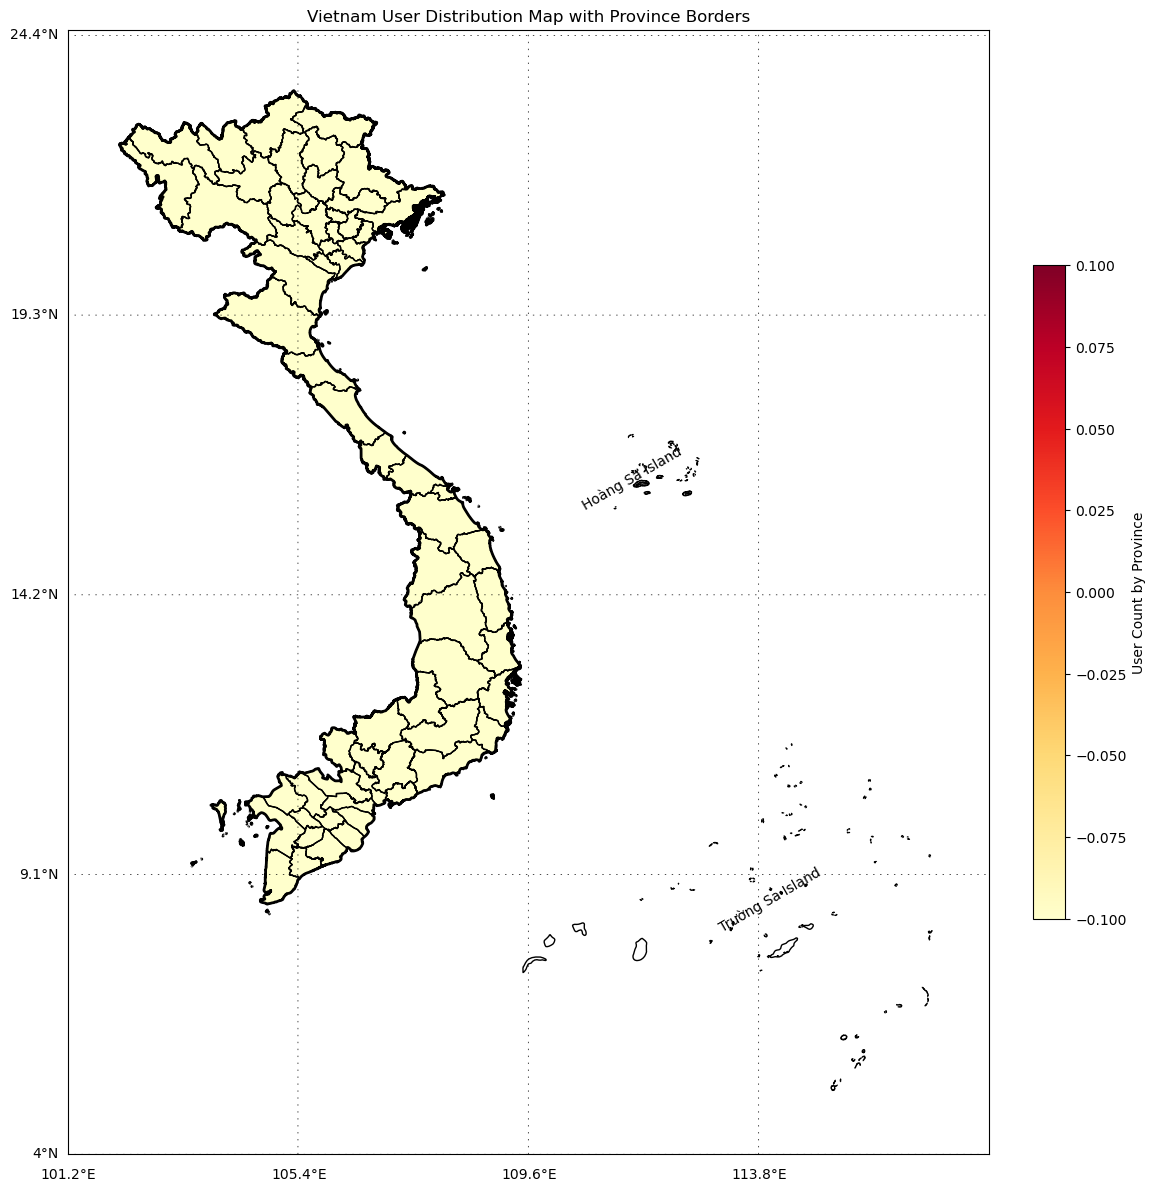

In [7]:
# Import libraries
from numpy import arange, around
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap

# =========================
# Step 1: Prepare your data
# =========================


folder_path = r"D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data"
file_name = "Data_UF_cleaned.xlsx"

user_data = pd.read_excel(f"{folder_path}\\{file_name}")

# Clean region names
user_data['Region_clean'] = user_data['Region'].str.replace(r'^\d+\.', '', regex=True).str.strip()

# Count users by region (keep total count, no division)
region_counts = user_data['Region'].value_counts().to_dict()

# Prepare province-user mapping: assign total region count to all provinces in that region
province_user_counts = []
province_names = []

for region, provinces in region_to_provinces.items():
    region_count = region_counts.get(region, 0)
    for province in provinces:
        province_names.append(province)
        province_user_counts.append(region_count)

# Create DataFrame
province_user_df = pd.DataFrame({
    'province': province_names,
    'user_count': province_user_counts
})


# =========================
# Step 2: Draw the map
# =========================

# Map bounding box
lon_min, lon_max = 101.2, 118
lat_min, lat_max = 4, 24.5

# Create basemap function
def create_basemap(ax, show_province_borders=False):
    m = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
                urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326, ax=ax)
    
    parallels = arange(lat_min, lat_max + 0.5, around((lat_max - lat_min) / 4, decimals=1))
    meridians = arange(lon_min, lon_max + 0.5, around((lon_max - lon_min) / 4, decimals=1))
    
    m.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10)
    
    try:
        m.readshapefile('haidao/haidao', 'haidao', linewidth=1, color='k')
    except FileNotFoundError:
        print("Shapefile 'haidao' not found.")
    
    try:
        m.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'country', linewidth=2, color='k')
    except FileNotFoundError:
        print("Shapefile 'gadm41_VNM_0' not found.")
    
    if show_province_borders:
        try:
            m.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'provinces', linewidth=1, color='k')
        except FileNotFoundError:
            print("Shapefile 'gadm41_VNM_1' not found.")
    
    return m

# Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Create map with province borders
m = create_basemap(ax, show_province_borders=True)
ax.set_title('Vietnam User Distribution Map with Province Borders')

# Add island labels
island_coords = [(111.5, 15.7, 'Hoàng Sa Island'), (114, 8, 'Trường Sa Island')]
for lon, lat, label in island_coords:
    x, y = m(lon, lat)
    ax.text(x, y, label, fontsize=10, ha='center', va='bottom', rotation=30, color='k')

# =========================
# Step 3: Overlay user distribution
# =========================

# Prepare province shapes and counts
province_shapes = []
province_user_counts = []

for info, shape in zip(m.provinces_info, m.provinces):
    province_name = info['NL_NAME_1'].split('|')[0]
    match = province_user_df[province_user_df['province'].str.contains(province_name, case=False, na=False)]
    user_count = match['user_count'].values[0] if not match.empty else 0
    province_shapes.append(shape)
    province_user_counts.append(user_count)

# Check actual user count range
print(f'Min user count: {min(province_user_counts)}, Max user count: {max(province_user_counts)}')

# Use fixed normalization range to improve color visibility
vmin = 0
vmax = max(province_user_counts)

cmap = plt.cm.YlOrRd
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Fill provinces with color
for shape, count in zip(province_shapes, province_user_counts):
    color = cmap(norm(count))
    poly = Polygon(shape, facecolor=color, edgecolor='black', linewidth=0.4)
    ax.add_patch(poly)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('User Count by Province')

# Final adjustments
plt.tight_layout()
plt.show()


      province  total_revenue
0   Binh Duong      8857800.0
1      Da Nang      8219400.0
2  Dong Bac Bo      9416400.0
3     Dong Nai      8473800.0
4  Dong Nam Bo     10733100.0


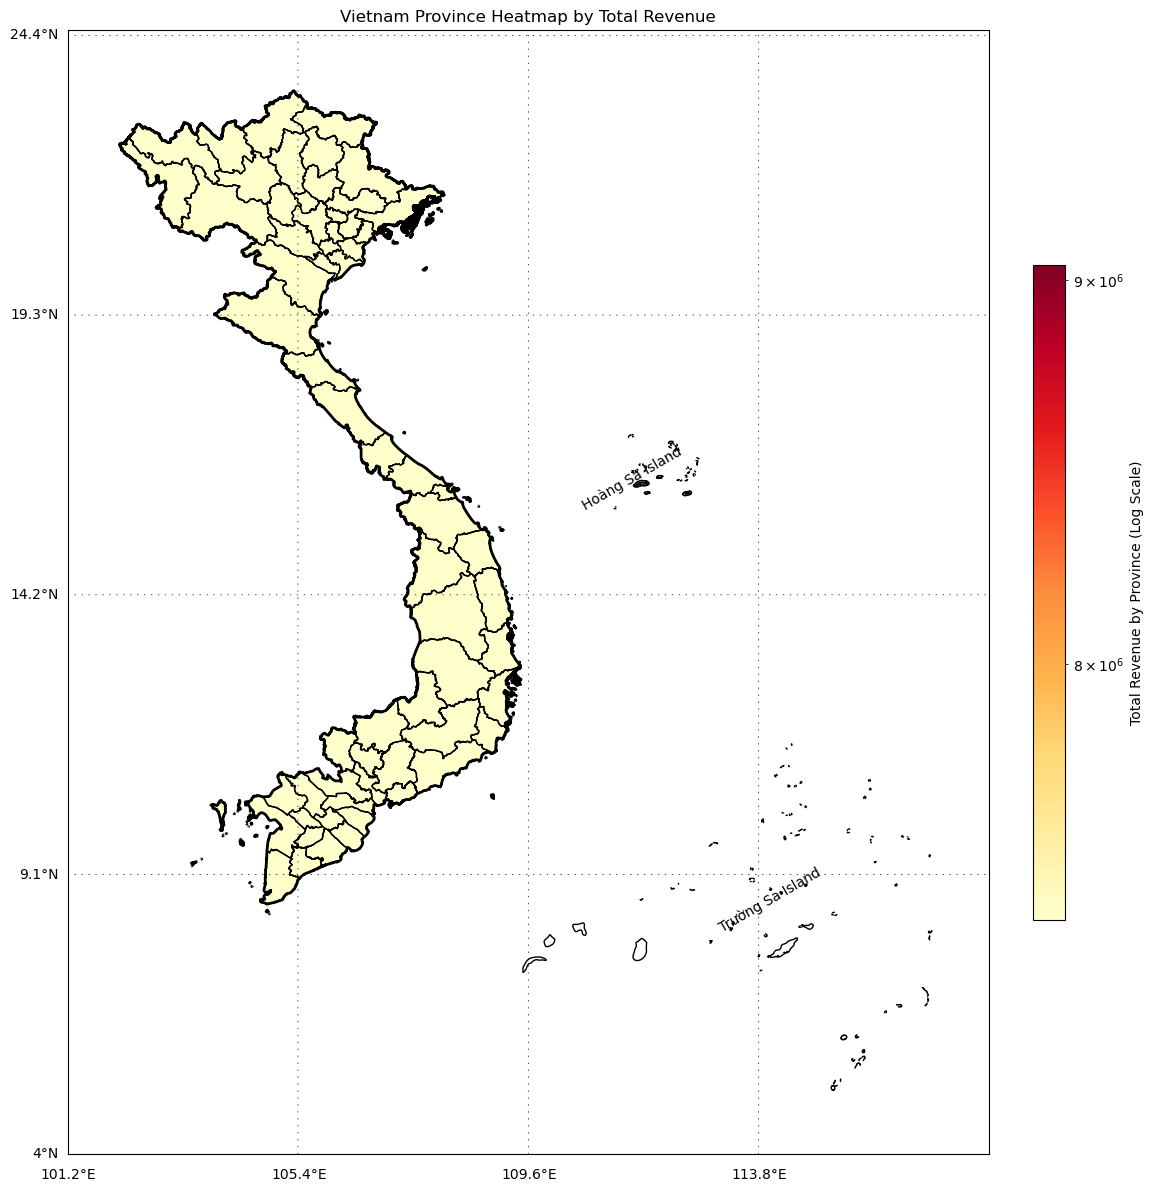

In [9]:
# Import libraries
from numpy import arange, around
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm

# =========================
# Step 1: Load and prepare data
# =========================

# Path to your cleaned CSV
file_path_csv = r'D:\USTH\Year_3\Internship\DeffendThesis\Defend-Thesis\Data\Data_UF_cleaned.csv'

# Read the CSV with correct encoding
user_data = pd.read_csv(file_path_csv, encoding='latin1')

# Clean the region names (remove number prefix)
user_data['Region_clean'] = user_data['Region'].str.replace(r'^\d+\.', '', regex=True).str.strip()

# Group by province (Region_clean) and sum revenue
province_revenue = user_data.groupby('Region_clean')['Revenue'].sum().reset_index()
province_revenue.columns = ['province', 'total_revenue']

# Check data
print(province_revenue.head())

# =========================
# Step 2: Prepare the map
# =========================

# Map bounding box
lon_min, lon_max = 101.2, 118
lat_min, lat_max = 4, 24.5

# Basemap function
def create_basemap(ax, show_province_borders=False):
    m = Basemap(projection='merc', llcrnrlon=lon_min, llcrnrlat=lat_min,
                urcrnrlon=lon_max, urcrnrlat=lat_max, resolution='i', epsg=4326, ax=ax)
    
    parallels = arange(lat_min, lat_max + 0.5, around((lat_max - lat_min) / 4, decimals=1))
    meridians = arange(lon_min, lon_max + 0.5, around((lon_max - lon_min) / 4, decimals=1))
    
    m.drawparallels(parallels, linewidth=0.5, dashes=[2, 8], labels=[1, 0, 0, 0], fontsize=10)
    m.drawmeridians(meridians, linewidth=0.5, dashes=[2, 8], labels=[0, 0, 0, 1], fontsize=10)
    
    try:
        m.readshapefile('haidao/haidao', 'haidao', linewidth=1, color='k')
    except FileNotFoundError:
        print("Shapefile 'haidao' not found.")
    
    try:
        m.readshapefile('gadm41_VNM_shp/gadm41_VNM_0', 'country', linewidth=2, color='k')
    except FileNotFoundError:
        print("Shapefile 'gadm41_VNM_0' not found.")
    
    if show_province_borders:
        try:
            m.readshapefile('gadm41_VNM_shp/gadm41_VNM_1', 'provinces', linewidth=1, color='k')
        except FileNotFoundError:
            print("Shapefile 'gadm41_VNM_1' not found.")
    
    return m

# =========================
# Step 3: Plot heatmap
# =========================

fig, ax = plt.subplots(figsize=(12, 12))

# Create the map with province borders
m = create_basemap(ax, show_province_borders=True)
ax.set_title('Vietnam Province Heatmap by Total Revenue')

# Add island labels
island_coords = [(111.5, 15.7, 'Hoàng Sa Island'), (114, 8, 'Trường Sa Island')]
for lon, lat, label in island_coords:
    x, y = m(lon, lat)
    ax.text(x, y, label, fontsize=10, ha='center', va='bottom', rotation=30, color='k')

# Prepare shapes and revenue
province_shapes = []
province_revenues = []

for info, shape in zip(m.provinces_info, m.provinces):
    province_name = info['NL_NAME_1'].split('|')[0].strip()
    match = province_revenue[province_revenue['province'].str.contains(province_name, case=False, na=False)]
    revenue = match['total_revenue'].values[0] if not match.empty else 0
    province_shapes.append(shape)
    province_revenues.append(revenue)

# Avoid zero for log scale
safe_revenues = [rev if rev > 0 else 1 for rev in province_revenues]

# Define color map and normalization
cmap = plt.cm.YlOrRd
norm = LogNorm(vmin=min(safe_revenues), vmax=max(safe_revenues))

# Fill provinces
for shape, revenue in zip(province_shapes, safe_revenues):
    color = cmap(norm(revenue))
    poly = Polygon(shape, facecolor=color, edgecolor='black', linewidth=0.4)
    ax.add_patch(poly)

# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Total Revenue by Province (Log Scale)')

# Final adjustments
plt.tight_layout()

# Optional: Save to file
plt.savefig('vietnam_revenue_heatmap.png', dpi=300, bbox_inches='tight')

plt.show()
